In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/avocado.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [4]:
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

In [5]:
df['year'] = df['year'].astype(int)

In [6]:
le_region = LabelEncoder()
df['region_encoded'] = le_region.fit_transform(df['region'])

In [7]:
df = df.drop(columns=['region', 'type', 'Date'])

In [8]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,type_encoded,region_encoded
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0,0


In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,type_encoded,region_encoded
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612,0.499918,26.495644
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281,0.500014,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000,0.000000,13.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000,0.000000,26.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000,1.000000,40.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000,1.000000,53.000000


In [10]:
df.isnull().sum()

Unnamed: 0        0
AveragePrice      0
Total Volume      0
4046              0
4225              0
4770              0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
year              0
month             0
day               0
type_encoded      0
region_encoded    0
dtype: int64

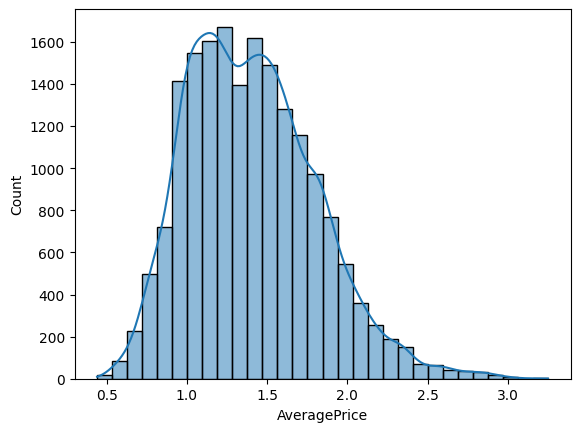

In [11]:
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.show()

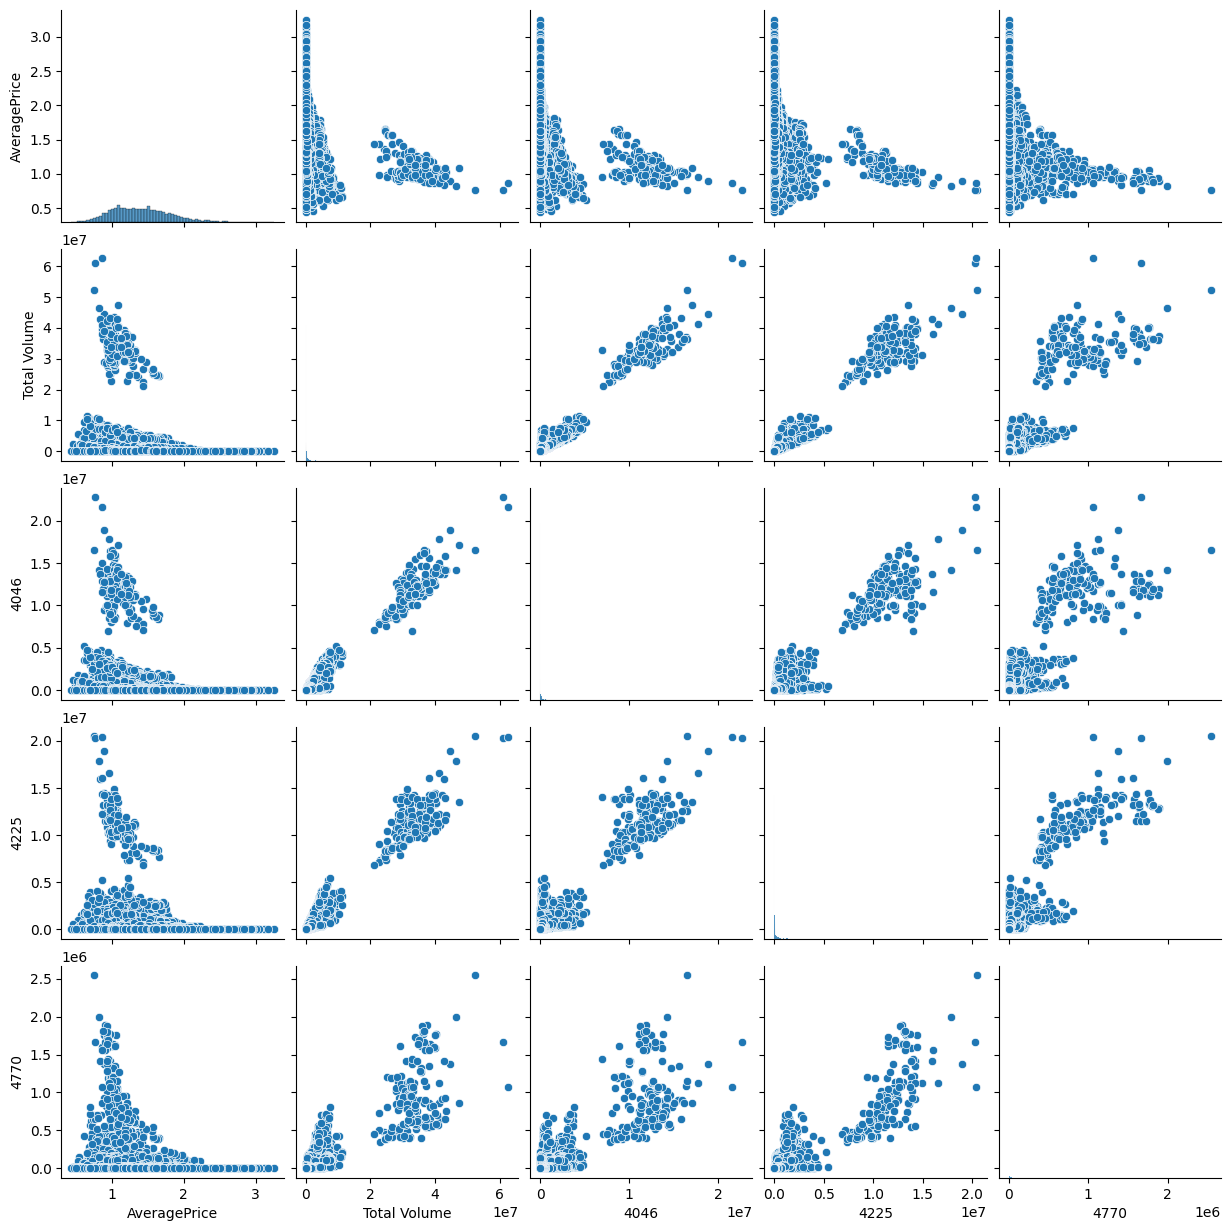

In [12]:
sns.pairplot(df[['AveragePrice', 'Total Volume', '4046', '4225', '4770']])
plt.show()

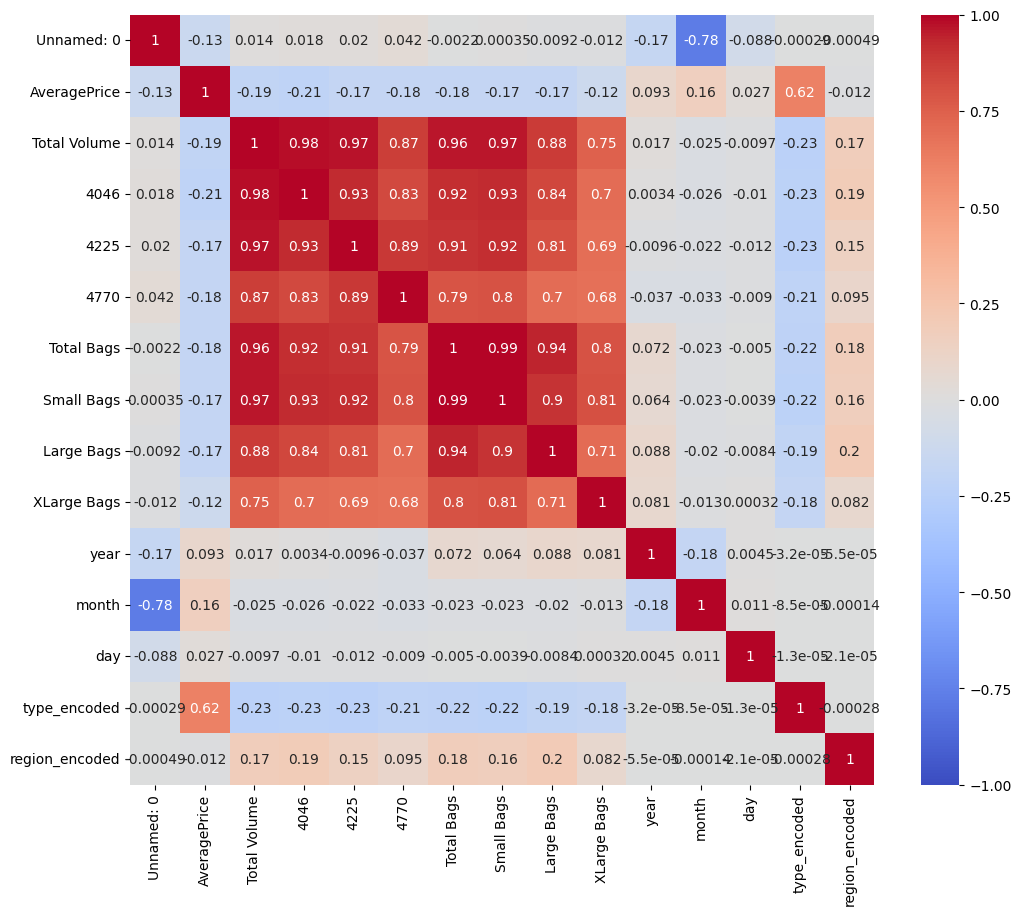

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [14]:
df = df.drop(columns=['Total Volume', 'day', 'region_encoded'])

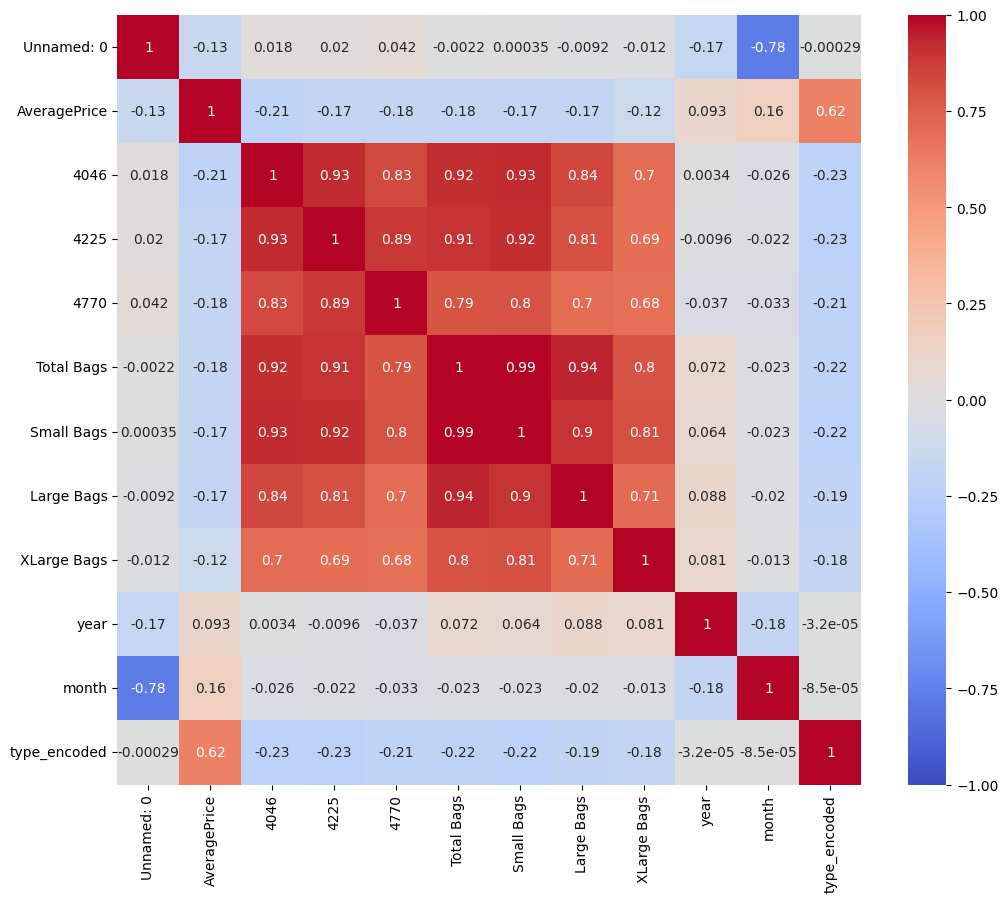

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [16]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(columns=['AveragePrice']), df['AveragePrice'], test_size=0.2, random_state=42)

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_X, train_y)

model.score(test_X, test_y)

0.8762397619246907

In [18]:
def sanitize_feature_names(df):
    new_columns = []
    for col in df.columns:
        new_col = re.sub('[^a-zA-Z0-9_]', '_', col)
        new_columns.append(new_col)
    df.columns = new_columns
    return df

In [20]:
train_X = sanitize_feature_names(train_X)
test_X = sanitize_feature_names(test_X)

model = LGBMRegressor(n_estimators=100, random_state=42)
model.fit(train_X, train_y)

model.score(test_X, test_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1858
[LightGBM] [Info] Number of data points in the train set: 14599, number of used features: 11
[LightGBM] [Info] Start training from score 1.404860


0.8420441943053174

In [ ]:
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(train_X, train_y)

model.score(test_X, test_y)